In [2]:
import sys
sys.path.insert(0, '..')

%reload_ext tools.prov_magics
import tools.view.versioned_prov
BASE = "../generated/versioned_prov"

# Versioned-PROV

## Names, literals, and constants

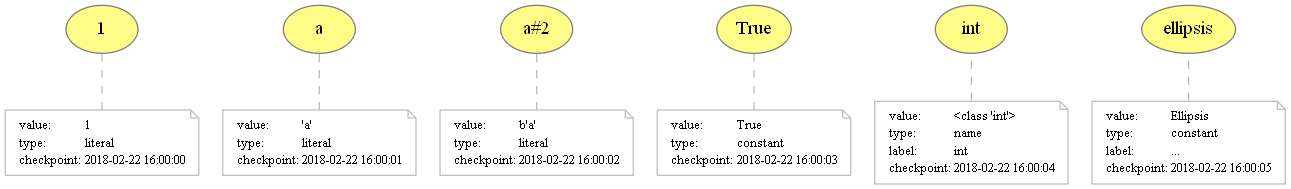

In [3]:
%%provn -o $BASE/names -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix version <https://dew-uff.github.io/versioned-prov/ns#>
    
entity(1, [value="1", type="script:literal", version:checkpoint="2018-02-22T16:00:00"])
entity(a, [value="'a'", type="script:literal", version:checkpoint="2018-02-22T16:00:01"])
entity(a#2, [value="b'a'", type="script:literal", version:checkpoint="2018-02-22T16:00:02"])
entity(True, [value="True", type="script:constant", version:checkpoint="2018-02-22T16:00:03"])
entity(int, [value="<class 'int'>", type="script:name", label="int", version:checkpoint="2018-02-22T16:00:04"])
entity(ellipsis, [value="Ellipsis", type="script:constant", label="...", version:checkpoint="2018-02-22T16:00:05"])

## Assignment

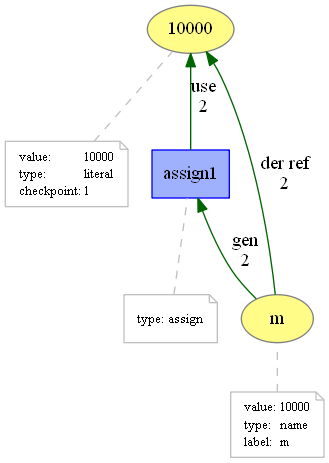

In [4]:
%%provn -o $BASE/assign -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix version <https://dew-uff.github.io/versioned-prov/ns#>
    
entity(10000, [value="10000", type="script:literal", version:checkpoint="1"])
entity(m, [value="10000", type="script:name", label="m"])

activity(assign1, [type="script:assign"])
wasDerivedFrom(m, 10000, assign1, g1, u1, [type="version:Reference", version:checkpoint="2"])

## Operation

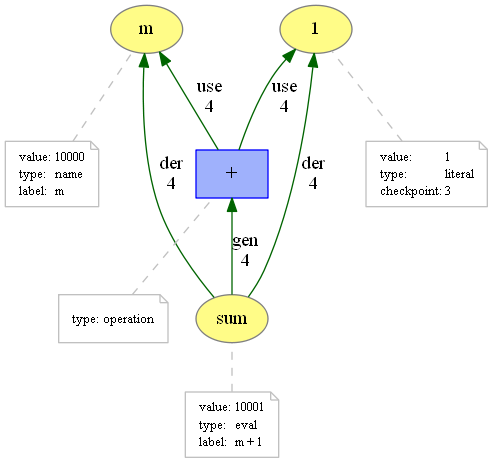

In [6]:
%%provn -o $BASE/operation -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix version <https://dew-uff.github.io/versioned-prov/ns#>

// old
entity(m, [value="10000", type="script:name", label="m"])

// new
entity(1, [value="1", type="script:literal",  version:checkpoint="3"])
entity(sum, [value="10001", type="script:eval", label="m + 1"])

activity(+, [type="script:operation"])
wasDerivedFrom(sum, m, +, g2, u2, [version:checkpoint="4"])
wasDerivedFrom(sum, 1, +, g2, u3, [version:checkpoint="4"])

## List definition

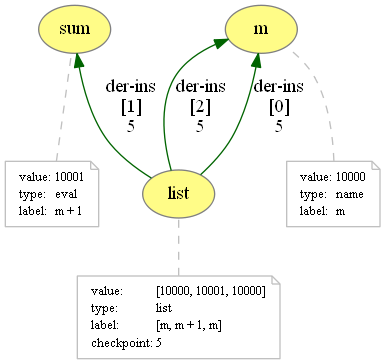

In [7]:
%%provn -o $BASE/list -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix version <https://dew-uff.github.io/versioned-prov/ns#>

// old
entity(m, [value="10000", type="script:name", label="m"])
entity(sum, [value="10001", type="script:eval", label="m + 1"])

// new
entity(list, [value="[10000, 10001, 10000]", type="script:list", label="[m, m + 1, m]", version:checkpoint="5"])
hadMember(list, m, [type="version:Insertion", version:key="0", version:checkpoint="5"])
hadMember(list, sum, [type="version:Insertion", version:key="1", version:checkpoint="5"])
hadMember(list, m, [type="version:Insertion", version:key="2", version:checkpoint="5"])

## Assignment of list definition

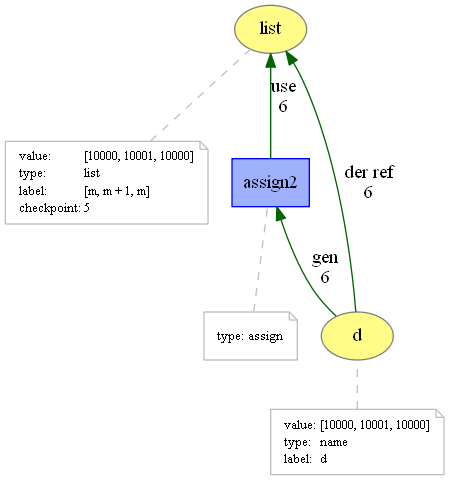

In [8]:
%%provn -o $BASE/list_assign -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix version <https://dew-uff.github.io/versioned-prov/ns#>

// old
entity(list, [value="[10000, 10001, 10000]", type="script:list", label="[m, m + 1, m]", version:checkpoint="5"])

// new
entity(d, [value="[10000, 10001, 10000]", type="script:name", label="d"])

activity(assign2, [type="script:assign"])
wasDerivedFrom(d, list, assign2, g3, u4, [type="version:Reference", version:checkpoint="6"])

### Assignment 2

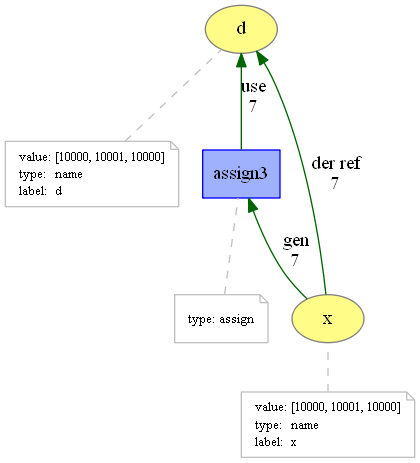

In [9]:
%%provn -o $BASE/list_assign2 -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix version <https://dew-uff.github.io/versioned-prov/ns#>

// old
entity(d, [value="[10000, 10001, 10000]", type="name", label="d"])

// new
entity(x, [value="[10000, 10001, 10000]", type="name", label="x"])

activity(assign3, [type="script:assign"])
wasDerivedFrom(x, d, assign3, g4, u5, [type="version:Reference", version:checkpoint="7"])

## Function call

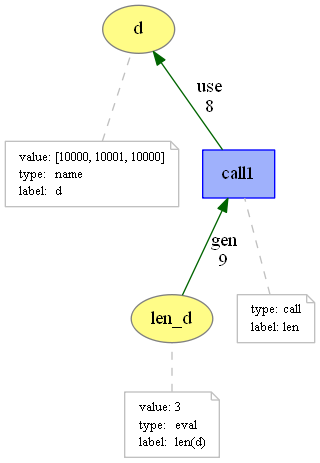

In [10]:
%%provn -o $BASE/call -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix version <https://dew-uff.github.io/versioned-prov/ns#>
    
// old
entity(d, [value="[10000, 10001, 10000]", type="script:name", label="d"])

// new
entity(len_d, [value="3", type="script:eval", label="len(d)"])

activity(call1, [type="script:call", label="len"])
used(call1, d, -, [version:checkpoint="8"])
wasGeneratedBy(len_d, call1, -, [version:checkpoint="9"])

## Access to part of structure

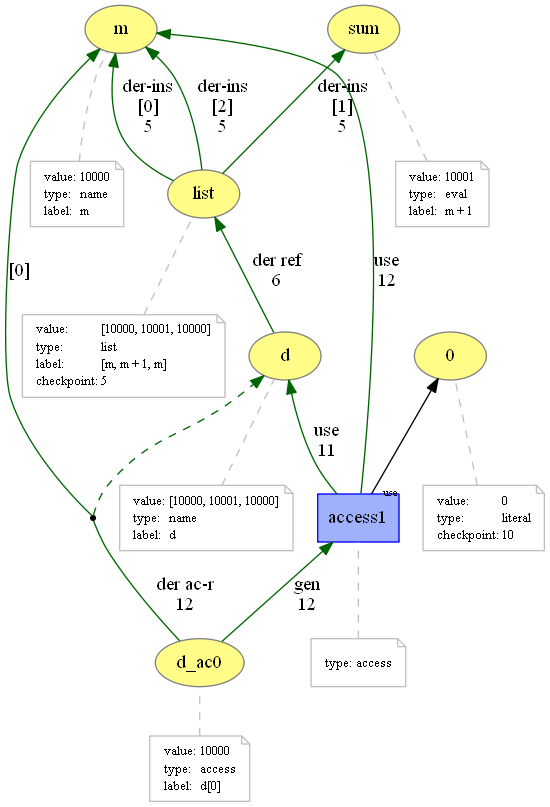

In [11]:
%%provn -o $BASE/access -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix version <https://dew-uff.github.io/versioned-prov/ns#>

// old
entity(m, [value="10000", type="script:name", label="m"])
entity(sum, [value="10001", type="script:eval", label="m + 1"])

entity(list, [value="[10000, 10001, 10000]", type="script:list", label="[m, m + 1, m]", version:checkpoint="5"])
hadMember(list, m, [type="version:Insertion", version:key="0", version:checkpoint="5"])
hadMember(list, sum, [type="version:Insertion", version:key="1", version:checkpoint="5"])
hadMember(list, m, [type="version:Insertion", version:key="2", version:checkpoint="5"])

entity(d, [value="[10000, 10001, 10000]", type="script:name", label="d"])
wasDerivedFrom(d, list, -, -, -, [type="version:Reference", version:checkpoint="6"])


// new
entity(0, [value="0", type="script:literal", version:checkpoint="10"])

entity(d_ac0, [value="10000", type="script:access", label="d[0]"])
activity(access1, [type="script:access"])
used(access1, d, -, [version:checkpoint="11"])
used(access1, 0, -)
wasDerivedFrom(d_ac0, m, access1, g5, u6, [
    type="version:Reference", version:checkpoint="12", 
    version:whole="d", version:key="0", version:access="r"])

## Assignment to part of structure

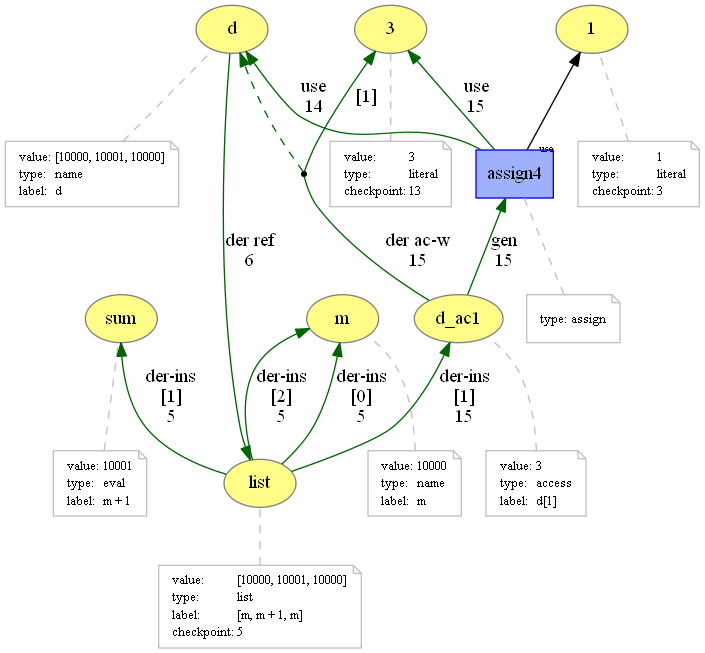

In [14]:
%%provn -o $BASE/part_assign -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix version <https://dew-uff.github.io/versioned-prov/ns#>

// old
entity(m, [value="10000", type="script:name", label="m"])
entity(sum, [value="10001", type="script:eval", label="m + 1"])

entity(list, [value="[10000, 10001, 10000]", type="script:list", label="[m, m + 1, m]", version:checkpoint="5"])
hadMember(list, m, [type="version:Insertion", version:key="0", version:checkpoint="5"])
hadMember(list, sum, [type="version:Insertion", version:key="1", version:checkpoint="5"])
hadMember(list, m, [type="version:Insertion", version:key="2", version:checkpoint="5"])

entity(d, [value="[10000, 10001, 10000]", type="script:name", label="d"])
wasDerivedFrom(d, list, -, -, -, [type="version:Reference", version:checkpoint="6"])
entity(1, [value="1", type="script:literal", version:checkpoint="3"])


// new
entity(3, [value="3", type="script:literal", version:checkpoint="13"])

entity(d_ac1, [value="3", type="script:access", label="d[1]"])
hadMember(list, d_ac1, [type="version:Insertion", version:key="1", version:checkpoint="15"])

activity(assign4, [type="script:assign"])
used(assign4, d, -, [version:checkpoint="14"])
used(assign4, 1, -)
wasDerivedFrom(d_ac1, 3, assign4, g6, u7, [
    type="version:Reference", version:checkpoint="15",
    version:whole="d", version:key="1", version:access="w"])

## Full

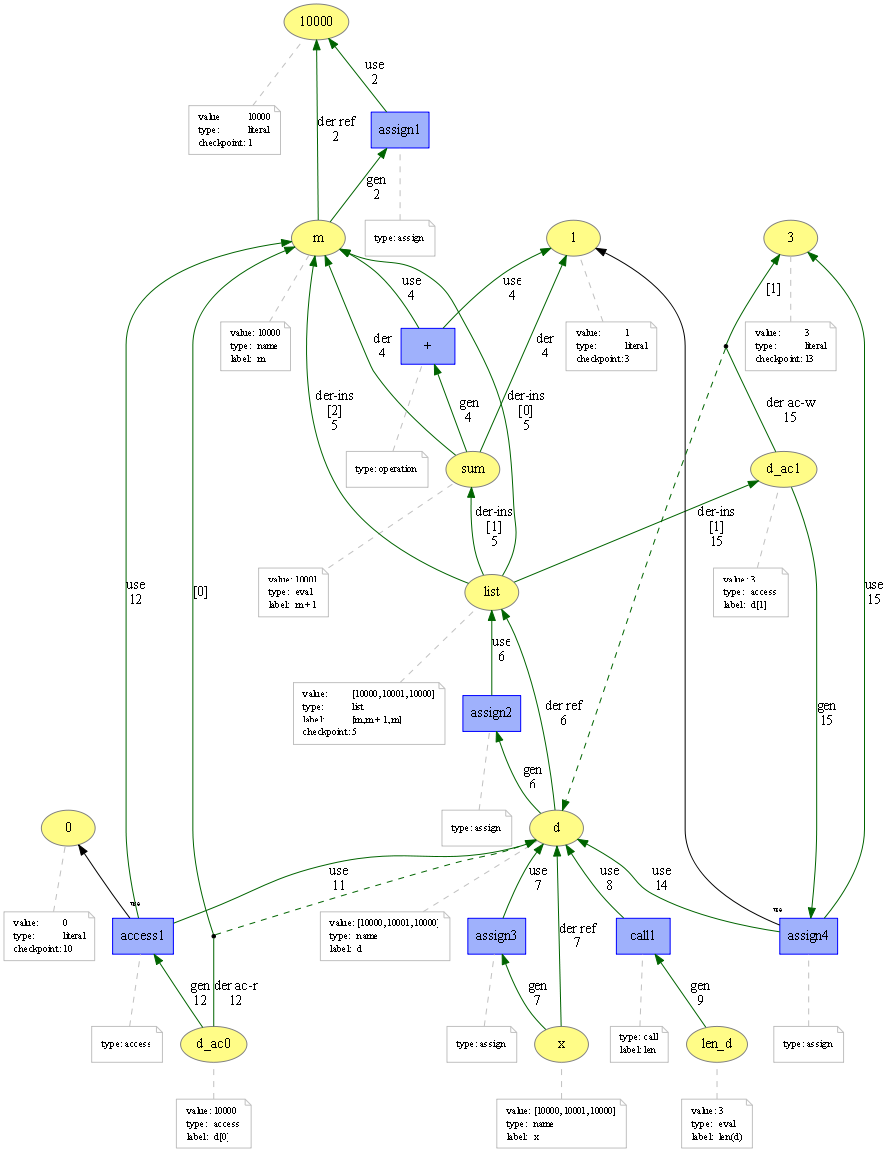

In [15]:
%%provn -o $BASE/full -e png svg pdf provn
prefix script <https://dew-uff.github.io/versioned-prov/ns/script#>
prefix version <https://dew-uff.github.io/versioned-prov/ns#>

// assignment
entity(10000, [value="10000", type="script:literal", version:checkpoint="1"])
entity(m, [value="10000", type="script:name", label="m"])

activity(assign1, [type="script:assign"])
wasDerivedFrom(m, 10000, assign1, g1, u1, [type="version:Reference", version:checkpoint="2"])

// operation
entity(1, [value="1", type="script:literal",  version:checkpoint="3"])
entity(sum, [value="10001", type="script:eval", label="m + 1"])

activity(+, [type="script:operation"])
wasDerivedFrom(sum, m, +, g2, u2, [version:checkpoint="4"])
wasDerivedFrom(sum, 1, +, g2, u3, [version:checkpoint="4"])

// list def
entity(list, [value="[10000, 10001, 10000]", type="script:list", label="[m, m + 1, m]", version:checkpoint="5"])
hadMember(list, m, [type="version:Insertion", version:key="0", version:checkpoint="5"])
hadMember(list, sum, [type="version:Insertion", version:key="1", version:checkpoint="5"])
hadMember(list, m, [type="version:Insertion", version:key="2", version:checkpoint="5"])

// list assign
entity(d, [value="[10000, 10001, 10000]", type="script:name", label="d"])

activity(assign2, [type="script:assign"])
wasDerivedFrom(d, list, assign2, g3, u4, [type="version:Reference", version:checkpoint="6"])

// list assign x
entity(x, [value="[10000, 10001, 10000]", type="name", label="x"])

activity(assign3, [type="script:assign"])
wasDerivedFrom(x, d, assign3, g4, u5, [type="version:Reference", version:checkpoint="7"])

// call
entity(len_d, [value="3", type="script:eval", label="len(d)"])

activity(call1, [type="script:call", label="len"])
used(call1, d, -, [version:checkpoint="8"])
wasGeneratedBy(len_d, call1, -, [version:checkpoint="9"])

// part access
entity(0, [value="0", type="script:literal", version:checkpoint="10"])

entity(d_ac0, [value="10000", type="script:access", label="d[0]"])
activity(access1, [type="script:access"])
used(access1, d, -, [version:checkpoint="11"])
used(access1, 0, -)
wasDerivedFrom(d_ac0, m, access1, g5, u6, [
    type="version:Reference", version:checkpoint="12", 
    version:whole="d", version:key="0", version:access="r"])

// part assign
entity(3, [value="3", type="script:literal", version:checkpoint="13"])

entity(d_ac1, [value="3", type="script:access", label="d[1]"])
hadMember(list, d_ac1, [type="version:Insertion", version:key="1", version:checkpoint="15"])

activity(assign4, [type="script:assign"])
used(assign4, d, -, [version:checkpoint="14"])
used(assign4, 1, -)
wasDerivedFrom(d_ac1, 3, assign4, g6, u7, [
    type="version:Reference", version:checkpoint="15",
    version:whole="d", version:key="1", version:access="w"])